**Table of Contents** <br>
* [1. Import libraries and datasets](#import)

* [2. Initial Exploration](#initialexploration)

* [3. Coherence Checking](#Coherence)

* [4. Split data](#Split)

* [5. Outliers Treatment](#outliers)
    * [5.1. Automatic Limitation](#AutomaticLimitation)
    * [5.2. IQR](#IQR)
    * [5.3. 2-dimensional outliers](#2dim_outliers)

* [6. Missing values Treatment](#missings)

* [7. Scale the data](#scale)

* [8. Feature Engeneering](#FeatureEngeneering)

* [9. Feature Selection](#FeatureSelection)
    * [9.1. Filter Methods](#filter)
    * [9.2. Wrapper Methods](#wrapper)
    * [9.3. Embedded Methods](#embedded)
    

* [10. Check for an imbalanced dataset](#imbalanced)

<hr>
<a class="anchor" id="import">
    
# 1. Import libraries and datasets
    
</a>

In [1]:
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import scipy.stats as stats

In [54]:
df = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

<hr>
<a class="anchor" id="initialexploration">
    
# 2. Initial Exploration
    
</a>

In [55]:
df.head()

,Access_ID,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor,Buy
0,102863333,21-Mar-20,0,0.0,0,0.0,3,64.0000,0.0000,0.0667,0.0000,MacOSX,2,Portugal,1,Returner,0
1,103117814,20-May-20,0,0.0,0,0.0,23,684.5000,0.0217,0.0449,0.0000,Windows,2,France,6,Returner,0
2,103201891,4-Dec-20,0,0.0,0,0.0,8,95.0000,0.0250,0.0583,0.0000,Windows,4,Italy,1,Returner,0
3,103226087,22-Dec-20,0,0.0,0,0.0,9,608.7500,0.0000,0.0250,42.4225,Windows,2,United Kingdom,2,Returner,1
4,103234445,24-Nov-20,0,0.0,2,386.0,36,1609.9397,0.0000,0.0093,12.5033,Windows,2,Spain,3,Returner,1


In [56]:
df.describe()

,Access_ID,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,Browser,Type_of_Traffic,Buy
count,9.999000e+03,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000
mean,4.519728e+08,2.324232,81.205854,0.508051,34.559101,31.685869,1199.769430,0.022305,0.043181,5.963120,2.352535,3.957496,0.155216
std,2.024990e+08,3.340676,179.715545,1.279390,139.796989,44.550277,1958.276304,0.048776,0.048845,18.753626,1.715698,3.675159,0.362128
min,1.028633e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,2.731950e+08,0.000000,0.000000,0.000000,0.000000,7.000000,183.562500,0.000000,0.014300,0.000000,2.000000,2.000000,0.000000
50%,4.536169e+08,1.000000,7.500000,0.000000,0.000000,18.000000,599.000000,0.003200,0.025100,0.000000,2.000000,2.000000,0.000000
75%,6.259756e+08,4.000000,92.208350,0.000000,0.000000,38.000000,1470.270800,0.016800,0.050000,0.000000,2.000000,4.000000,0.000000
max,7.984440e+08,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522200,0.200000,0.200000,361.763700,13.000000,15.000000,1.000000


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Access_ID                   9999 non-null   int64  
 1   Date                        9999 non-null   object 
 2   AccountMng_Pages            9999 non-null   int64  
 3   AccountMng_Duration         9999 non-null   float64
 4   FAQ_Pages                   9999 non-null   int64  
 5   FAQ_Duration                9999 non-null   float64
 6   Product_Pages               9999 non-null   int64  
 7   Product_Duration            9999 non-null   float64
 8   GoogleAnalytics_BounceRate  9999 non-null   float64
 9   GoogleAnalytics_ExitRate    9999 non-null   float64
 10  GoogleAnalytics_PageValue   9999 non-null   float64
 11  OS                          9999 non-null   object 
 12  Browser                     9999 non-null   int64  
 13  Country                     9999 

In [58]:
df.isna().sum()

Access_ID                     0
Date                          0
AccountMng_Pages              0
AccountMng_Duration           0
FAQ_Pages                     0
FAQ_Duration                  0
Product_Pages                 0
Product_Duration              0
GoogleAnalytics_BounceRate    0
GoogleAnalytics_ExitRate      0
GoogleAnalytics_PageValue     0
OS                            0
Browser                       0
Country                       0
Type_of_Traffic               0
Type_of_Visitor               0
Buy                           0
dtype: int64

In [59]:
techScapeReport = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
#techScapeReport.to_notebook_iframe()

## Data Preparation

### Access_ID

<b>Unique identification of the user access to the website
* The Access_ID variable is 100% distinct across all records, hence we can use it as an index.

In [60]:
df = df.set_index(["Access_ID"])

### Date

<b>Website visit date

* For practicality it was decided to convert the date variable to a datetime object

In [61]:
df["Date"] = pd.to_datetime(df["Date"], format = "%d-%b-%y")

In [62]:
# Checking datatypes
df.dtypes

Date                          datetime64[ns]
AccountMng_Pages                       int64
AccountMng_Duration                  float64
FAQ_Pages                              int64
FAQ_Duration                         float64
Product_Pages                          int64
Product_Duration                     float64
GoogleAnalytics_BounceRate           float64
GoogleAnalytics_ExitRate             float64
GoogleAnalytics_PageValue            float64
OS                                    object
Browser                                int64
Country                               object
Type_of_Traffic                        int64
Type_of_Visitor                       object
Buy                                    int64
dtype: object

In [63]:
df['AccountMng_Pages']=df['AccountMng_Pages'].astype(pd.Int32Dtype())
df['AccountMng_Duration']=df['AccountMng_Duration'].astype(pd.Float32Dtype())

df['FAQ_Pages']=df['FAQ_Pages'].astype(pd.Int32Dtype())
df['FAQ_Duration']=df['FAQ_Duration'].astype(pd.Float32Dtype())
df['Product_Pages']=df['Product_Pages'].astype(pd.Int32Dtype())
df['Product_Duration']=df['Product_Duration'].astype(pd.Float32Dtype())
df['GoogleAnalytics_BounceRate']=df['GoogleAnalytics_BounceRate'].astype(pd.Float32Dtype())
df['GoogleAnalytics_ExitRate']=df['GoogleAnalytics_ExitRate'].astype(pd.Float32Dtype())
df['GoogleAnalytics_PageValue']=df['GoogleAnalytics_PageValue'].astype(pd.Float32Dtype())
df['OS']=df['OS'].astype(pd.StringDtype())
df['Browser']=df['Browser'].astype(pd.Int32Dtype())
df['Country']=df['Country'].astype(pd.StringDtype())
df['Type_of_Traffic']=df['Type_of_Traffic'].astype(pd.Int32Dtype())
df['Type_of_Visitor']=df['Type_of_Visitor'].astype(pd.StringDtype())
df['Buy']=df['Buy'].astype(pd.Int32Dtype())


In [64]:
df.dtypes

Date                          datetime64[ns]
AccountMng_Pages                       Int32
AccountMng_Duration                  Float32
FAQ_Pages                              Int32
FAQ_Duration                         Float32
Product_Pages                          Int32
Product_Duration                     Float32
GoogleAnalytics_BounceRate           Float32
GoogleAnalytics_ExitRate             Float32
GoogleAnalytics_PageValue            Float32
OS                                    string
Browser                                Int32
Country                               string
Type_of_Traffic                        Int32
Type_of_Visitor                       string
Buy                                    Int32
dtype: object

<hr>
<a class="anchor" id="Coherence">
    
# 3. Coherence Checking
    
</a>

In [65]:
# confirming that the first and last day of every month is correct
df['day']=df['Date'].dt.day
df.groupby(df['Date'].dt.month).agg(['min', 'max'])['day']

,min,max
Date,,
2,1,29
3,1,31
5,1,31
6,1,30
7,1,31
8,1,31
9,1,30
10,1,31
11,1,30


In [66]:
df[(df['AccountMng_Duration']>0) & (df['AccountMng_Pages']==0)]
df[(df['AccountMng_Duration']==0) & (df['AccountMng_Pages']>0)] 
#df[(df['FAQ_Pages']>0) & (df['FAQ_Duration']==0)]#176
#df[(df['FAQ_Pages']==0) & (df['FAQ_Duration']>0)]
#df[(df['Product_Pages']==0) & (df['Product_Pages']>0)]
#df[(df['Product_Pages']>0) & (df['Product_Pages']==0)]

,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor,Buy,day
Access_ID,,,,,,,,,,,,,,,,,
104650368,2020-11-05,1,0.0,0,0.0,14,1125.875,0.0,0.0429,0.0,Windows,2,Portugal,2,Returner,0,5
107375098,2020-08-07,1,0.0,3,69.0,15,352.875,0.0,0.0556,0.0,Windows,2,Spain,2,Returner,0,7
113677580,2020-11-28,1,0.0,0,0.0,39,1159.541748,0.0013,0.0313,0.0,Windows,2,Other,2,Returner,1,28
115628954,2020-05-23,2,0.0,0,0.0,0,0.0,0.2,0.2,0.0,Android,2,Portugal,6,Returner,0,23
116343256,2020-10-11,1,0.0,1,66.400002,14,668.316711,0.0143,0.0286,44.893501,iOS,2,Portugal,15,Returner,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776479996,2020-06-26,1,0.0,0,0.0,12,277.450012,0.06,0.09,0.0,MacOSX,2,Spain,13,Returner,0,26
776570163,2020-05-25,1,0.0,0,0.0,27,889.0,0.0214,0.0679,0.0,iOS,1,Spain,3,Returner,0,25
778884123,2020-05-26,1,0.0,0,0.0,90,5621.599121,0.0,0.0131,2.099,Windows,2,Italy,2,Returner,0,26


In [67]:
df=df[~(((df['AccountMng_Duration']>0) & (df['AccountMng_Pages']==0))|
    ((df['AccountMng_Duration']==0) & (df['AccountMng_Pages']>0))|
    ((df['FAQ_Pages']>0) & (df['FAQ_Duration']==0))|
    ((df['FAQ_Pages']==0) & (df['FAQ_Duration']>0))|
    ((df['Product_Pages']==0) & (df['Product_Pages']>0))|
    ((df['Product_Pages']>0) & (df['Product_Pages']==0)))]

In [68]:
df

,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor,Buy,day
Access_ID,,,,,,,,,,,,,,,,,
102863333,2020-03-21,0,0.0,0,0.0,3,64.0,0.0,0.0667,0.0,MacOSX,2,Portugal,1,Returner,0,21
103117814,2020-05-20,0,0.0,0,0.0,23,684.5,0.0217,0.0449,0.0,Windows,2,France,6,Returner,0,20
103201891,2020-12-04,0,0.0,0,0.0,8,95.0,0.025,0.0583,0.0,Windows,4,Italy,1,Returner,0,4
103226087,2020-12-22,0,0.0,0,0.0,9,608.75,0.0,0.025,42.422501,Windows,2,United Kingdom,2,Returner,1,22
103234445,2020-11-24,0,0.0,2,386.0,36,1609.939697,0.0,0.0093,12.5033,Windows,2,Spain,3,Returner,1,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798279589,2020-05-08,3,159.0,2,55.5,23,1100.125,0.0,0.0111,0.0,MacOSX,2,Brazil,14,Returner,0,8
798314158,2020-07-17,6,175.100006,0,0.0,3,27.6,0.0,0.0111,0.0,Windows,10,Spain,5,New_Access,0,17
798339820,2020-03-23,0,0.0,0,0.0,27,644.0,0.0077,0.0519,0.0,MacOSX,2,France,3,Returner,0,23


In [69]:
# percentage of records removed due to inconsistency
289/9999

0.028902890289028902

## Removing Outliers From Data

<b>Using drop_outliers to drop unwanted outliers from df </b>
* Having analysed the distrbution of this variable, it became apparent that there may be outliers.
* It was decided to drop the outliers and then later on reintroduce them if, as a result, the accuracy of the model suffered. Dropped 119 records (1.2%).

In [70]:
metric_features = df.select_dtypes(include=np.number).columns.tolist()
metric_features.remove('Buy')
metric_features

['AccountMng_Pages',
 'AccountMng_Duration',
 'FAQ_Pages',
 'FAQ_Duration',
 'Product_Pages',
 'Product_Duration',
 'GoogleAnalytics_BounceRate',
 'GoogleAnalytics_ExitRate',
 'GoogleAnalytics_PageValue',
 'Browser',
 'Type_of_Traffic',
 'day']

### Manual Filtering

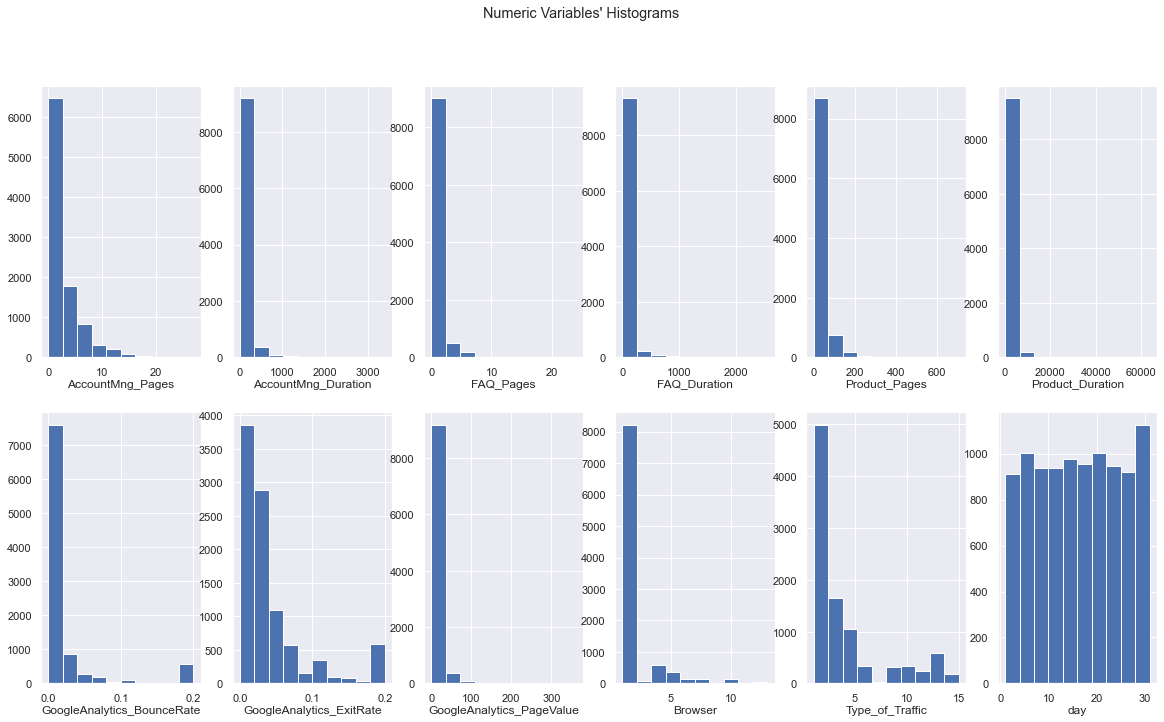

In [71]:
# All Numeric Variables' Histograms in one figure
import seaborn as sns
import matplotlib.pyplot as plt
from math import ceil
%matplotlib inline


sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    ax.hist(df[feat])
    ax.set_title(feat, y=-0.13)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title)

#plt.savefig("teste.png")

In [72]:
filters1 = (
    (df['AccountMng_Pages']<=20)
     &
     (df['AccountMng_Duration']<=1200)
     &
     (df['FAQ_Pages']<=10)
     &
     (df['FAQ_Duration']<=900)
     &
     (df['Product_Pages']<=210)
     &
     (df['Product_Duration']<=17000)
     #&
     #(df['GoogleAnalytics_BounceRate']<=0.15)
     &
     (df['GoogleAnalytics_PageValue']<=120)
     &
     (df['Browser']<=12))

df[filters1]

,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor,Buy,day
Access_ID,,,,,,,,,,,,,,,,,
102863333,2020-03-21,0,0.0,0,0.0,3,64.0,0.0,0.0667,0.0,MacOSX,2,Portugal,1,Returner,0,21
103117814,2020-05-20,0,0.0,0,0.0,23,684.5,0.0217,0.0449,0.0,Windows,2,France,6,Returner,0,20
103201891,2020-12-04,0,0.0,0,0.0,8,95.0,0.025,0.0583,0.0,Windows,4,Italy,1,Returner,0,4
103226087,2020-12-22,0,0.0,0,0.0,9,608.75,0.0,0.025,42.422501,Windows,2,United Kingdom,2,Returner,1,22
103234445,2020-11-24,0,0.0,2,386.0,36,1609.939697,0.0,0.0093,12.5033,Windows,2,Spain,3,Returner,1,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798279589,2020-05-08,3,159.0,2,55.5,23,1100.125,0.0,0.0111,0.0,MacOSX,2,Brazil,14,Returner,0,8
798314158,2020-07-17,6,175.100006,0,0.0,3,27.6,0.0,0.0111,0.0,Windows,10,Spain,5,New_Access,0,17
798339820,2020-03-23,0,0.0,0,0.0,27,644.0,0.0077,0.0519,0.0,MacOSX,2,France,3,Returner,0,23


In [114]:
print(filters1[filters1==False])

Access_ID
103570984    False
104662870    False
108811566    False
108868307    False
110816776    False
             ...  
787298940    False
789017559    False
790156117    False
791664448    False
793964307    False
Length: 298, dtype: boolean


In [133]:
type(filters1)

pandas.core.series.Series

In [73]:
9412/9710

0.9693099897013389

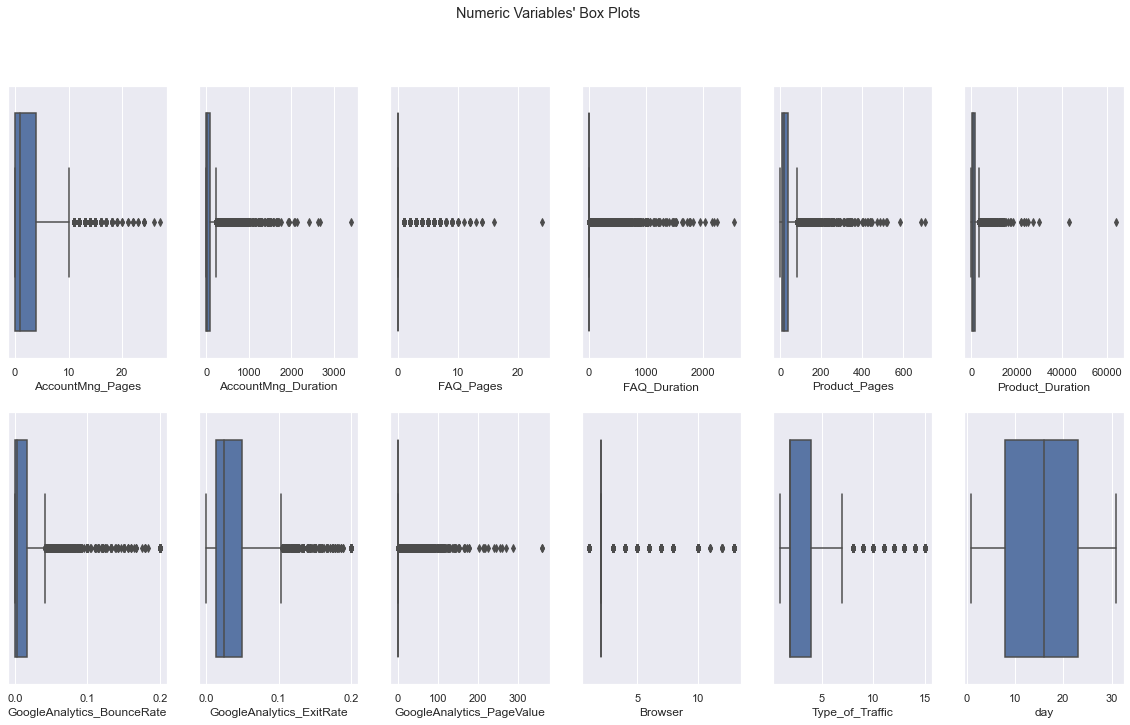

In [74]:
# All Numeric Variables' Box Plots in one figure
%matplotlib inline
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(x=df[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.show()

In [81]:
q25 = df.quantile(.25)
print(q25)
q75 = df.quantile(.75)
iqr = (q75 - q25)

upper_lim = q75 + 1.5 * iqr
lower_lim = q25 - 1.5 * iqr

filters2 = []
for metric in metric_features:
    llim = lower_lim[metric]
    ulim = upper_lim[metric]
    filters2.append(df[metric].between(llim, ulim, inclusive=True))
print(filters2)
filters2 = pd.Series(np.all(filters2, 0))
df_2 = df[filters2]
print('Percentage of data kept after removing outliers:', np.round(df_2.shape[0] / df_original.shape[0], 4))

AccountMng_Pages                     0.0
AccountMng_Duration                  0.0
FAQ_Pages                            0.0
FAQ_Duration                         0.0
Product_Pages                        7.0
Product_Duration              181.016678
GoogleAnalytics_BounceRate           0.0
GoogleAnalytics_ExitRate          0.0141
GoogleAnalytics_PageValue            0.0
Browser                              2.0
Type_of_Traffic                      2.0
Buy                                  0.0
day                                  8.0
Name: 0.25, dtype: Float64
[Access_ID
102863333    True
103117814    True
103201891    True
103226087    True
103234445    True
             ... 
798279589    True
798314158    True
798339820    True
798371242    True
798444008    True
Name: AccountMng_Pages, Length: 9710, dtype: boolean, Access_ID
102863333    True
103117814    True
103201891    True
103226087    True
103234445    True
             ... 
798279589    True
798314158    True
798339820    True
79837

C:\Users\UTILIZ~1\AppData\Local\Temp/ipykernel_14792/857990898.py:13: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  filters2.append(df[metric].between(llim, ulim, inclusive=True))
C:\Users\UTILIZ~1\AppData\Local\Temp/ipykernel_14792/857990898.py:13: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  filters2.append(df[metric].between(llim, ulim, inclusive=True))
C:\Users\UTILIZ~1\AppData\Local\Temp/ipykernel_14792/857990898.py:13: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  filters2.append(df[metric].between(llim, ulim, inclusive=True))
C:\Users\UTILIZ~1\AppData\Local\Temp/ipykernel_14792/857990898.py:13: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  filters2.append(df[metric].between(llim, ulim, inclusive=True))
C:\Users\UTILIZ~1\AppData\Local\

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [75]:
df_no_out = df[(filters1 | filters2)]
print('Percentage of data kept after removing outliers:', np.round(df_no_out.shape[0] / df.shape[0], 4))

Percentage of data kept after removing outliers: 0.9693


C:\Users\UTILIZ~1\AppData\Local\Temp/ipykernel_14792/2221622883.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_no_out = df[(filters1 | filters2)]


In [193]:
def drop_outliers_IQR(data, iqr_mult,  metric_features):

    filters2 = []
    for metric in metric_features:
    
        q25 = data[metric].quantile(.25)
        q75 = data[metric].quantile(.75)
        iqr = (q75 - q25)
        upper_lim = q75 + iqr_mult * iqr
        lower_lim = q25 - iqr_mult * iqr
        print(upper_lim)
        print(lower_lim)
        filters2.append(data[metric].between(lower_lim, upper_lim, inclusive=True))
        
        print(filters2[filters2==False])
    
       
    
    df_2 = data[filters2]

   
    return df_2

In [194]:
drop_outliers_IQR(df,1,metric_features=['Product_Duration'])

2735.9442138671875
-1096.4470672607422
Access_ID
102863333    True
103117814    True
103201891    True
103226087    True
103234445    True
             ... 
798279589    True
798314158    True
798339820    True
798371242    True
798444008    True
Name: Product_Duration, Length: 9710, dtype: boolean


C:\Users\UTILIZ~1\AppData\Local\Temp/ipykernel_14792/2098000812.py:13: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  filters2.append(data[metric].between(lower_lim, upper_lim, inclusive=True))


KeyError: "None of [Index([(True, True, True, True, True, True, False, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, False, True, True, True, False, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, True, False, True, True, True, False, True, False, True, True, True, True, True, True, False, True, True, False, True, True, True, True, ...)], dtype='object')] are in the [columns]"

In [ ]:
def drop_outliers(df, z_score, *args):
    """Drop statistical outliers from selected columns in selected dataframes with selected z-score as threshold. 

    Args:
        df (DataFrame): DataFrame to apply function to.
        z_score (int): Number of standard deviations away from the mean set as a threshold to drop outliers from.
        drop (bool): True allows for *columns to be columns to drop, whilst False allows *columns to be the only selected columns to use.
        *columns (str): Columns which need to be selected or dropped based on drop argument.

    Returns:
        [DataFrame: [description]
    """

    initial_length = len(df)

    for col in df.columns:
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')) & (col in args):
            inital_length_col = len(df)
            df = df[~(np.abs(stats.zscore(df["FAQ_Pages"])) > z_score)]
            final_length_col = len(df)
            print("-------------------------------")
            print(f"Flitering: {col}\nDropped {inital_length_col-final_length_col} ({round(((inital_length_col-final_length_col)/inital_length_col)*100,2)}%) records")
        else:
            df[col]=df[col]

    final_length = len(df)
    print("-------------------------------")
    print("-------------------------------")
    print(f"Removed: {initial_length - final_length} ({round(((initial_length - final_length)/initial_length)*100,2)}%) records.\n ")

    return df

In [ ]:
train_no_outliers = drop_outliers(df,3, "FAQ_Pages")

In [ ]:
train_no_outliers[~(np.abs(stats.zscore(train_no_outliers["FAQ_Pages"])) > 5)]

### Create Data, Target and Split

In [ ]:
data = train_no_outliers.drop("Buy", axis = 1)
target = train_no_outliers["Buy"]
print(data.shape)
print(target.shape)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_val,y_train,y_val = train_test_split(data,target, stratify = target, train_size = 0.75)

### Separate Numerical from Categorical 

In [ ]:
X_train_num = X_train.select_dtypes(include=np.number).set_index(X_train.index)
X_train_cat = X_train.select_dtypes(exclude=np.number).set_index(X_train.index)
#For validation
X_val_num = X_val.select_dtypes(include=np.number).set_index(X_val.index)
X_val_cat = X_val.select_dtypes(exclude=np.number).set_index(X_val.index)

### Scaling Data 

In [ ]:
from sklearn.preprocessing import MinMaxScaler

X_train_num_scaled =  MinMaxScaler().fit_transform(X_train_num)

# Convert the array to a pandas dataframe
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns = X_train_num.columns).set_index(X_train.index)
X_train_num_scaled.head(3)

In [ ]:
scaler = MinMaxScaler().fit(X_train_num)
X_val_num_scaled = scaler.transform(X_val_num)
X_val_num_scaled = pd.DataFrame(X_val_num_scaled, columns = X_val_num.columns).set_index(X_val.index)
X_val_num_scaled.head(3)